In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
import pylab as plot
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plot.rcParams.update(params)

In [5]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
check = pd.read_csv('test.csv')
check.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
data.shape

(891, 12)

In [8]:
check.shape

(418, 11)

In [9]:
data = data.append(check)
data.shape

C:\Users\DELL\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


(1309, 12)

In [10]:
data.sample(10)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
671,31.0,B71,S,52.0000,"Davidson, Mr. Thornton",0,672,1,male,1,0.0,F.C. 12750
797,31.0,NaN,S,8.6833,"Osman, Mrs. Mara",0,798,3,female,0,1.0,349244
132,NaN,NaN,S,25.4667,"Lefebre, Mrs. Frank (Frances)",4,1024,3,female,0,NaN,4133
214,38.0,NaN,S,7.7750,"Andersson, Miss. Ida Augusta Margareta",2,1106,3,female,4,NaN,347091
778,NaN,NaN,Q,7.7375,"Kilgannon, Mr. Thomas J",0,779,3,male,0,0.0,36865
199,24.0,NaN,S,13.0000,"Yrois, Miss. Henriette (""Mrs Harbeck"")",0,200,2,female,0,0.0,248747
637,31.0,NaN,S,26.2500,"Collyer, Mr. Harvey",1,638,2,male,1,0.0,C.A. 31921
103,33.0,NaN,S,8.6542,"Johansson, Mr. Gustaf Joel",0,104,3,male,0,0.0,7540
200,28.0,NaN,S,9.5000,"Vande Walle, Mr. Nestor Cyriel",0,201,3,male,0,0.0,345770
128,42.0,NaN,S,13.0000,"Bowenur, Mr. Solomon",0,1020,2,male,0,NaN,211535


In [11]:
data.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [12]:
data.dtypes

Age            float64
Cabin           object
Embarked        object
Fare           float64
Name            object
Parch            int64
PassengerId      int64
Pclass           int64
Sex             object
SibSp            int64
Survived       float64
Ticket          object
dtype: object

In [13]:
data.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [14]:
data.loc[(data["Ticket"]=="11751"),]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
248,37.0,D35,S,52.5542,"Beckwith, Mr. Richard Leonard",1,249,1,male,1,1.0,11751
871,47.0,D35,S,52.5542,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",1,872,1,female,1,1.0,11751


# Exploration

In [15]:
data['Dead']= 1-data['Survived']

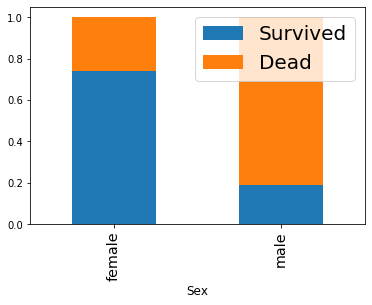

In [16]:
data.groupby('Sex').agg('mean')[['Survived', 'Dead']].plot(kind ='bar', stacked = True)

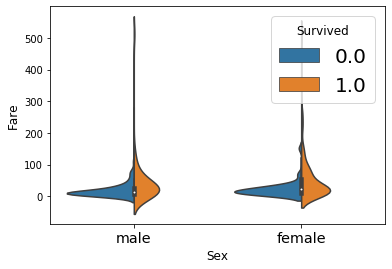

In [17]:
sns.violinplot(x='Sex', y='Fare', hue='Survived', data=data, split=True);

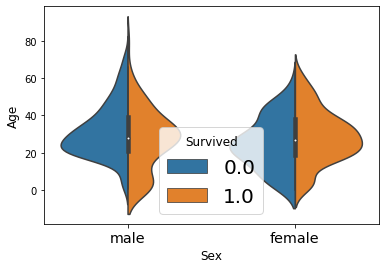

In [18]:
sns.violinplot(x='Sex', y='Age', hue='Survived', data=data, split=True);

In [19]:
data["Last_Name"], data["First_Name"] = data["Name"].str.split(",",1).str
data["Salutation"], data["Rest"] = data["First_Name"].str.split(". ", 1).str
data["Deck"] = data["Cabin"].str[:1]
data['Salutation'] = data['Salutation'].str.strip()
data2 = data.drop(columns=['First_Name', 'Rest', 'Name', 'Cabin'])
data2.sample(10)

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Dead,Last_Name,Salutation,Deck
261,3.0,S,31.3875,2,262,3,male,4,1.0,347077,0.0,Asplund,Master,NaN
887,19.0,S,30.0000,0,888,1,female,0,1.0,112053,0.0,Graham,Miss,B
818,43.0,S,6.4500,0,819,3,male,0,0.0,C 7075,1.0,Holm,Mr,NaN
248,37.0,S,52.5542,1,249,1,male,1,1.0,11751,0.0,Beckwith,Mr,D
479,2.0,S,12.2875,1,480,3,female,0,1.0,3101298,0.0,Hirvonen,Miss,NaN
158,42.0,S,26.5500,0,1050,1,male,0,NaN,110489,NaN,Borebank,Mr,D
499,24.0,S,7.7958,0,500,3,male,0,0.0,350035,1.0,Svensson,Mr,NaN
125,17.0,S,16.1000,1,1017,3,female,0,NaN,371362,NaN,Cribb,Miss,NaN
160,NaN,Q,7.7333,0,1052,3,female,0,NaN,335432,NaN,Smyth,Miss,NaN
388,NaN,Q,7.7292,0,389,3,male,0,0.0,367655,1.0,Sadlier,Mr,NaN


In [20]:
data2['Salutation'] = data2['Salutation'].map(lambda x: 'Miss' if x in ['Ms', 'Mlle','Mme', 'Dona'] else x)
data2['Salutation'] = data2['Salutation'].map(lambda x: 'Officer' if x in ['Capt', 'Col','Major', 'Dr', 'Rev'] else x)
data2['Salutation'] = data2['Salutation'].map(lambda x: 'Royalty' if x in ['Don','Sir','Jonkheer','th','Lady'] else x)
data2['Salutation'].value_counts()

Mr         757
Miss       266
Mrs        197
Master      61
Officer     23
Royalty      5
Name: Salutation, dtype: int64

In [21]:
data2['Family'] = data2['SibSp'] + data2['Parch']+1
data2.head()
data2['Single'] = data2['Family'].map(lambda x: 1 if x == 1 else 0)
data2['Small_Family'] = data2['Family'].map(lambda x: 1 if 2 <= x <= 4 else 0)
data2['Big_Family'] = data2['Family'].map(lambda x: 1 if x > 4 else 0)
data2['Big_Family'].sum()

82

In [22]:
data2['Ticket'] = data2['Ticket'].str.replace('/','')
data2['Ticket'] = data2['Ticket'].str.replace('.','')
data2['Ticket_pref'] = data2['Ticket'].str.split(" ",1).str[0]
data2['Ck'] = data2['Ticket'].str.isnumeric()

data2['Ticket_pref'] = np.where(data2['Ck'] ==True, 'XXX', data2['Ticket_pref'])
data2 = data2.drop(columns='Ck')
data2.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Dead,Last_Name,Salutation,Deck,Family,Single,Small_Family,Big_Family,Ticket_pref
0,22.0,S,7.2500,0,1,3,male,1,0.0,A5 21171,1.0,Braund,Mr,NaN,2,0,1,0,A5
1,38.0,C,71.2833,0,2,1,female,1,1.0,PC 17599,0.0,Cumings,Mrs,C,2,0,1,0,PC
2,26.0,S,7.9250,0,3,3,female,0,1.0,STONO2 3101282,0.0,Heikkinen,Miss,NaN,1,1,0,0,STONO2
3,35.0,S,53.1000,0,4,1,female,1,1.0,113803,0.0,Futrelle,Mrs,C,2,0,1,0,XXX
4,35.0,S,8.0500,0,5,3,male,0,0.0,373450,1.0,Allen,Mr,NaN,1,1,0,0,XXX


# Imputation

In [23]:
data2.isnull().sum()

Age              263
Embarked           2
Fare               1
Parch              0
PassengerId        0
Pclass             0
Sex                0
SibSp              0
Survived         418
Ticket             0
Dead             418
Last_Name          0
Salutation         0
Deck            1014
Family             0
Single             0
Small_Family       0
Big_Family         0
Ticket_pref        0
dtype: int64

In [24]:
data2['Embarked'].fillna(data2['Embarked'].mode()[0], inplace = True)
data2['Deck'].fillna('U', inplace = True)
data2['Embarked'].fillna(data2['Embarked'].mode()[0], inplace = True)
data2['Deck'].fillna('U', inplace = True)

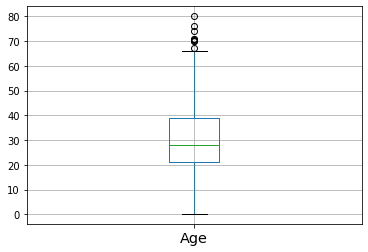

In [25]:
data.boxplot(column= "Age")

In [26]:
grouped_train = data2.iloc[:891].groupby(['Sex','Pclass','Salutation'])
grouped_median_train = grouped_train.median()
grouped_median_train = grouped_median_train.reset_index()[['Sex', 'Pclass', 'Salutation', 'Age']]
grouped_median_train.tail()

,Sex,Pclass,Salutation,Age
12,male,2,Master,1.0
13,male,2,Mr,31.0
14,male,2,Officer,46.5
15,male,3,Master,4.0
16,male,3,Mr,26.0


In [27]:
def fill_age(row):
    condition = (
        (grouped_median_train['Sex'] == row['Sex']) & 
        (grouped_median_train['Salutation'] == row['Salutation']) & 
        (grouped_median_train['Pclass'] == row['Pclass'])
    ) 
    return grouped_median_train[condition]['Age'].values[0]

data2['Age'] = data2.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)

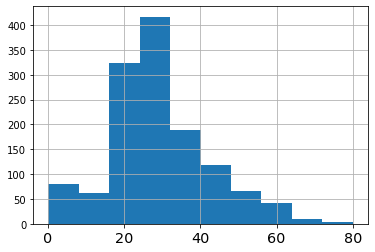

In [28]:
data2['Age'].hist()

In [29]:
bins = [0,15,25,40,65,100]
groups = ['Children', 'Youth', 'Adult', 'MiddleAge','Seniors']
data2['Age_grp'] = pd.cut(data2['Age'], bins, labels= groups)
print(data2['Age_grp'].value_counts())
data2 = data2.drop(columns= 'Age')

Adult        570
Youth        378
MiddleAge    228
Children     123
Seniors       10
Name: Age_grp, dtype: int64


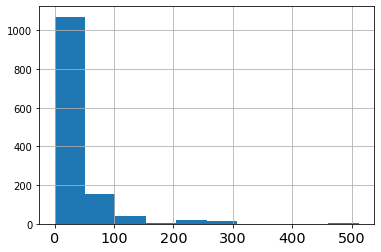

In [30]:
data2['Fare'].hist()

In [31]:
tr = data2.iloc[:891,]

Fare_range = pd.qcut(tr['Fare'], 5)
print(Fare_range.value_counts())

(7.854, 10.5]        184
(21.679, 39.688]     180
(-0.001, 7.854]      179
(39.688, 512.329]    176
(10.5, 21.679]       172
Name: Fare, dtype: int64


In [32]:
bins = [-0.1, 7.854,10.5,21.679,39.688,512.330]
group = [0,1,2,3,4]
data2['Fare_grp'] = pd.cut(data2['Fare'], bins, labels= group)
data2['Fare_grp'].value_counts()
data2 = data2.drop(columns= 'Fare')

In [33]:
one_hot = pd.get_dummies(data2['Embarked'],prefix='Embarked')
p_class = pd.get_dummies(data2['Pclass'], prefix='Pclass')
sex = pd.get_dummies(data2['Sex'], prefix = 'Sex')
Salutation = pd.get_dummies(data2['Salutation'], prefix = 'Sal')
#Deck = pd.get_dummies(data2['Deck'], prefix = 'Deck')
Tick = pd.get_dummies(data2['Ticket_pref'], prefix = 'Tkt')
Age = pd.get_dummies(data2['Age_grp'], prefix = 'Age')
Fare = pd.get_dummies(data2['Fare_grp'], prefix = 'Fare')

In [34]:
comb = [one_hot, p_class, sex, Salutation,Tick,Age,Fare]
data3 = pd.concat(comb, axis = 1)
#data3.sample(10)
print(data2.shape)
print(data3.shape)
data2['SNO'] = 1
data3['SNO'] = 1
data2['SNO'] = data2['SNO'].cumsum()
data3['SNO'] = data3['SNO'].cumsum()
data4 = data2.merge(data3, left_on='SNO', right_on='SNO', how='inner')
data4.shape

(1309, 19)
(1309, 61)


(1309, 81)

In [35]:
data4.dtypes

Embarked       object
Parch           int64
PassengerId     int64
Pclass          int64
Sex            object
                ...  
Fare_0          uint8
Fare_1          uint8
Fare_2          uint8
Fare_3          uint8
Fare_4          uint8
Length: 81, dtype: object

In [36]:
prep = data4.drop(columns=['Fare_grp', 'Tkt_A', 'Sal_Miss', 'Sal_Mr', 'Sal_Master', 'Fare_4', 
'Tkt_A4',
'Tkt_AQ3',
'Tkt_AQ4',
'Tkt_AS',
'Tkt_C',
'Tkt_CASOTON',
'Tkt_FC',
'Tkt_FCC',
'Tkt_Fa',
'Tkt_LINE',
'Tkt_LP',
'Tkt_PP',
'Tkt_PPP',
'Tkt_SC',
'Tkt_SCA3',
'Tkt_SCA4',
'Tkt_SCAH',
'Tkt_SCOW',
'Tkt_SCPARIS',
'Tkt_SCParis',
'Tkt_SOC',
'Tkt_SOP',
'Tkt_SOPP',
'Tkt_SOTONO2',
'Tkt_SOTONOQ',
'Tkt_SP',
'Tkt_STONO',
'Tkt_STONO2',
'Tkt_STONOQ',
'Tkt_SWPP',
'Tkt_WC',
'Tkt_WEP','Age_grp','Age_Seniors','Fare_0','Embarked_S','Sex_male','Pclass_3','Sal_Officer','Tkt_XXX','Pclass','Dead','Parch','SibSp','Ticket_pref','Sex','Ticket','Embarked','Last_Name','Salutation','Deck','SNO','Family'], axis=1)

In [37]:
prep.dtypes

PassengerId        int64
Survived         float64
Single             int64
Small_Family       int64
Big_Family         int64
Embarked_C         uint8
Embarked_Q         uint8
Pclass_1           uint8
Pclass_2           uint8
Sex_female         uint8
Sal_Mrs            uint8
Sal_Royalty        uint8
Tkt_A5             uint8
Tkt_CA             uint8
Tkt_PC             uint8
Age_Children       uint8
Age_Youth          uint8
Age_Adult          uint8
Age_MiddleAge      uint8
Fare_1             uint8
Fare_2             uint8
Fare_3             uint8
dtype: object

In [38]:
prep.sum()

PassengerId      857395.0
Survived            342.0
Single              790.0
Small_Family        437.0
Big_Family           82.0
Embarked_C          270.0
Embarked_Q          123.0
Pclass_1            323.0
Pclass_2            277.0
Sex_female          466.0
Sal_Mrs             197.0
Sal_Royalty           5.0
Tkt_A5               28.0
Tkt_CA               68.0
Tkt_PC               92.0
Age_Children        123.0
Age_Youth           378.0
Age_Adult           570.0
Age_MiddleAge       228.0
Fare_1              275.0
Fare_2              255.0
Fare_3              260.0
dtype: float64

In [39]:
#splitting new and train data
#chk = prep.loc[isnull(prep['Survived']) == True,]
chk = prep[pd.isnull(prep['Survived'])]
chk = chk.drop(columns=['Survived'], axis=1)
print(chk.shape)

#datis = prep.dropna(subset = ['Survived'], how = 'all', inplace= True)
prep = prep[prep['Survived'] >= 0]
prep = prep.drop(columns=['PassengerId'], axis=1)
print(prep.shape)
#df.dropna(subset=[1])
#df.dropna(subset=['EPS'], how='all', inplace = True)
#df = df[df.EPS >= 0]

(418, 21)
(891, 21)


In [40]:
prep.corr(method='spearman')

,Survived,Single,Small_Family,Big_Family,Embarked_C,Embarked_Q,Pclass_1,Pclass_2,Sex_female,Sal_Mrs,...,Tkt_A5,Tkt_CA,Tkt_PC,Age_Children,Age_Youth,Age_Adult,Age_MiddleAge,Fare_1,Fare_2,Fare_3
Survived,1.000000,-0.203367,0.279855,-0.125147,0.168240,0.003650,0.285904,0.093349,0.543351,0.339040,...,-0.092199,-0.019137,0.147062,0.136884,-0.005687,-0.085847,0.024854,-0.198067,0.043153,0.060373
Single,-0.203367,1.000000,-0.859931,-0.336825,-0.095298,0.086464,-0.113364,-0.039070,-0.303646,-0.365454,...,0.050549,-0.117245,-0.019783,-0.358790,0.053502,0.188261,-0.042835,0.338625,-0.145954,-0.217122
Small_Family,0.279855,-0.859931,1.000000,-0.190940,0.158586,-0.087093,0.168568,0.104546,0.260747,0.372029,...,-0.029666,0.006430,0.041377,0.181151,-0.052569,-0.108224,0.073383,-0.279801,0.194048,0.081314
Big_Family,-0.125147,-0.336825,-0.190940,1.000000,-0.109274,-0.005620,-0.092945,-0.117721,0.102954,0.016535,...,-0.042488,0.213620,-0.038283,0.355838,-0.005918,-0.162413,-0.052993,-0.135075,-0.077273,0.267558
Embarked_C,0.168240,-0.095298,0.158586,-0.109274,1.000000,-0.148258,0.296423,-0.125416,0.082853,0.061395,...,-0.074892,-0.105869,0.397139,0.034760,-0.061748,0.000506,0.042283,-0.201512,0.005520,-0.029439
Embarked_Q,0.003650,0.086464,-0.087093,-0.005620,-0.148258,1.000000,-0.155342,-0.127301,0.074115,-0.089739,...,-0.021454,-0.067548,-0.082643,-0.033890,0.089786,0.009040,-0.096346,-0.096489,-0.038317,-0.056012
Pclass_1,0.285904,-0.113364,0.168568,-0.092945,0.296423,-0.155342,1.000000,-0.288585,0.098013,0.088207,...,-0.087887,-0.124239,0.475007,-0.133146,-0.147137,-0.031816,0.309898,-0.301390,-0.275681,0.130974
Pclass_2,0.093349,-0.039070,0.104546,-0.117721,-0.125416,-0.127301,-0.288585,1.000000,0.064746,0.121239,...,-0.079259,0.139384,-0.137080,0.009655,-0.026113,0.011441,0.006038,-0.111456,0.314612,0.183454
Sex_female,0.543351,-0.303646,0.260747,0.102954,0.082853,0.074115,0.098013,0.064746,1.000000,0.547600,...,-0.083638,0.006179,0.073639,0.097669,0.129419,-0.175810,0.017444,-0.166584,0.099850,0.036281
Sal_Mrs,0.339040,-0.365454,0.372029,0.016535,0.061395,-0.089739,0.088207,0.121239,0.547600,1.000000,...,-0.020155,0.019250,0.046197,-0.111109,-0.111044,0.026079,0.196536,-0.145139,0.114970,0.061103


# Prediction

In [65]:
from sklearn.linear_model import LogisticRegression  
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV, StratifiedKFold,train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [66]:
def model_comb(dat,modl):

    y = dat['Survived']
    x = dat
    x = x.drop('Survived', axis = 1)
    #Model fit
    modl.fit(x,y)
    
    #Model Predictions
    predictions = modl.predict(x)
    
    #Accuracy
    acc = 0
    acc = metrics.accuracy_score(predictions,y)
    print("Accuracy score: ", acc)
    
    #Kfold cross validation
    cf = KFold(dat.shape[0], n_folds= 5)
    acc_all = []
    for train, test in cf:
        x_tr = x.iloc[train,:]
        y_tr = y.iloc[train]
        
        modl.fit(x_tr, y_tr)
        pred = modl.predict(x_tr)
        
        x_ts = x.iloc[test, :]
        y_ts = y.iloc[test]
        
        acc_all.append(modl.score(x_ts,y_ts))
    
    print("Cross fold score : ", np.mean(acc_all))
    
    modl.fit(x,y)


In [70]:
modl = LogisticRegression()

In [61]:
modl = RandomForestClassifier()